# Demo Notebook to train, save, and load a model, which will be used on the Flask Webapp

## Imports

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

## Data Processing

In [3]:
dataset = pd.read_csv('playground/data/mobile-price-classification/train.csv')

#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

## Model Construction

In [4]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training

In [5]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1800/1800 [==============================] - 0s 86us/step - loss: 1.5000 - accuracy: 0.2528
Epoch 2/100
1800/1800 [==============================] - 0s 27us/step - loss: 1.4194 - accuracy: 0.2833
Epoch 3/100
1800/1800 [==============================] - 0s 23us/step - loss: 1.3754 - accuracy: 0.3178
Epoch 4/100
1800/1800 [==============================] - 0s 22us/step - loss: 1.3399 - accuracy: 0.3567
Epoch 5/100
1800/1800 [==============================] - 0s 32us/step - loss: 1.3009 - accuracy: 0.3878
Epoch 6/100
1800/1800 [==============================] - 0s 32us/step - loss: 1.2520 - accuracy: 0.4272
Epoch 7/100
1800/1800 [==============================] - 0s 34us/step - loss: 1.1898 - accuracy: 0.4700
Epoch 8/100
1800/1800 [==============================] - 0s 29us/step - loss: 1.1132 - accuracy: 0.5133
Epoch 9/100
1800/1800 [==============================] - 0s 33us/step - loss: 1.0272 - accuracy: 0.5422
Epoch 10/100
1800/1800 [==============================] - 0s 38u

1800/1800 [==============================] - 0s 29us/step - loss: 0.0627 - accuracy: 0.9833
Epoch 80/100
1800/1800 [==============================] - 0s 34us/step - loss: 0.0611 - accuracy: 0.9867
Epoch 81/100
1800/1800 [==============================] - 0s 30us/step - loss: 0.0600 - accuracy: 0.9894
Epoch 82/100
1800/1800 [==============================] - 0s 29us/step - loss: 0.0580 - accuracy: 0.9861
Epoch 83/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0566 - accuracy: 0.9900
Epoch 84/100
1800/1800 [==============================] - 0s 19us/step - loss: 0.0561 - accuracy: 0.9883
Epoch 85/100
1800/1800 [==============================] - 0s 24us/step - loss: 0.0549 - accuracy: 0.9900
Epoch 86/100
1800/1800 [==============================] - 0s 23us/step - loss: 0.0543 - accuracy: 0.9894
Epoch 87/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0527 - accuracy: 0.9900
Epoch 88/100
1800/1800 [==============================] - 0s 24us/st

## Testing

In [6]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Accuracy is: 92.0
Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 34us/step - loss: 0.0406 - accuracy: 0.9961 - val_loss: 0.1570 - val_accuracy: 0.9300
Epoch 2/100
1800/1800 [==============================] - 0s 25us/step - loss: 0.0397 - accuracy: 0.9961 - val_loss: 0.1581 - val_accuracy: 0.9250
Epoch 3/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.0387 - accuracy: 0.9967 - val_loss: 0.1572 - val_accuracy: 0.9200
Epoch 4/100
1800/1800 [==============================] - 0s 25us/step - loss: 0.0382 - accuracy: 0.9967 - val_loss: 0.1575 - val_accuracy: 0.9250
Epoch 5/100
1800/1800 [==============================] - 0s 28us/step - loss: 0.0370 - accuracy: 0.9972 - val_loss: 0.1569 - val_accuracy: 0.9300
Epoch 6/100
1800/1800 [==============================] - 0s 29us/step - loss: 0.0368 - accuracy: 0.9961 - val_loss: 0.1574 - val_accuracy: 0.9350
Epoch 7/100
1800/1800 [==============================] - 0s

1800/1800 [==============================] - 0s 34us/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2022 - val_accuracy: 0.9200
Epoch 57/100
1800/1800 [==============================] - 0s 19us/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.1989 - val_accuracy: 0.9250
Epoch 58/100
1800/1800 [==============================] - 0s 22us/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.1995 - val_accuracy: 0.9250
Epoch 59/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0147 - accuracy: 0.9994 - val_loss: 0.1964 - val_accuracy: 0.9300
Epoch 60/100
1800/1800 [==============================] - 0s 21us/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.2030 - val_accuracy: 0.9250
Epoch 61/100
1800/1800 [==============================] - 0s 19us/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.9250
Epoch 62/100
1800/1800 [==============================] - 0s 23us/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.2030 - val_a

## Visualisation

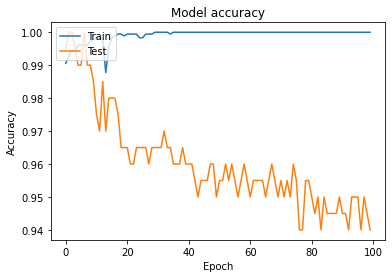

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

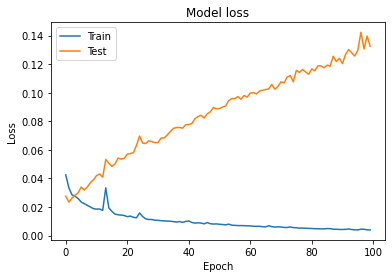

In [8]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Save Model

In [23]:
model.save('./playground/demo_model.h5')

## Load Model

Imports and Data Preprocessing have to be executed, then the loaded model can be used for the Testing and Visualisation steps

In [ ]:
model = keras.models.load_model('./playground/demo_model.h5')